In [442]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # geração de gráficos
import seaborn as sns # geração de gráficos

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [443]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv("test.csv")

Percebe-se um número maior de features no dataset de treino.  
Portanto, algumas features de treino não devem ser usadas na análise.

In [444]:
print(df_train.shape)
print(df_test.shape)

(13730, 167)
(4576, 47)


A variável alvo se encontra no dataset de Treino. Ela não está presente em Teste.

In [445]:
df_train['NU_NOTA_MT'].head()

0    399.4
1    459.8
2      NaN
3      NaN
4      NaN
Name: NU_NOTA_MT, dtype: float64

É preciso colocar o dataset Treino com as mesmas colunas do dataset Teste, mais a variável alvo.

In [446]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [447]:
df_train = df_train[['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'NU_NOTA_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]

Agora treino só tem uma coluna a mais do que teste (NU_NOTA_MT). 

In [448]:
print(df_train.shape)
print(df_test.shape)

(13730, 48)
(4576, 47)


Podemos então realizar a análise exploratória nos dados de Treino

In [449]:
df_pivot = pd.DataFrame({'types': df_train.dtypes,
                         'nulls': df_train.isna().sum(),
                          '% nulls': df_train.isna().sum() / train.shape[0],
                          'size': df_train.shape[0],
                          'uniques': df_train.nunique()})
df_pivot

,types,nulls,% nulls,size,uniques
NU_INSCRICAO,object,0,0.000000,13730,13730
CO_UF_RESIDENCIA,int64,0,0.000000,13730,27
SG_UF_RESIDENCIA,object,0,0.000000,13730,27
NU_IDADE,int64,0,0.000000,13730,55
TP_SEXO,object,0,0.000000,13730,2
TP_COR_RACA,int64,0,0.000000,13730,6
TP_NACIONALIDADE,int64,0,0.000000,13730,5
TP_ST_CONCLUSAO,int64,0,0.000000,13730,4
TP_ANO_CONCLUIU,int64,0,0.000000,13730,11
TP_ESCOLA,int64,0,0.000000,13730,4


Analisando a correlação entre as features e a variável alvo

In [470]:
correlacao = df_train.corr()
correlacao.style.background_gradient(cmap='coolwarm').set_precision(2)

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
CO_UF_RESIDENCIA,1.00,-0.02,-0.24,0.01,0.03,-0.06,0.07,0.02,-0.03,0.08,-0.02,nan,-0.00,0.00,0.00,-0.04,-0.01,-0.02,nan,nan,nan,0.08,0.12,0.13,-0.10,0.11,nan,0.08,0.05,0.05,0.06,0.04,0.06
NU_IDADE,-0.02,1.00,0.01,-0.01,-0.30,0.71,-0.28,0.50,-0.29,-0.09,0.02,nan,-0.00,0.00,-0.00,0.01,0.01,0.07,nan,nan,nan,-0.05,0.01,-0.02,0.09,-0.06,nan,-0.09,-0.10,-0.09,-0.10,-0.08,-0.11
TP_COR_RACA,-0.24,0.01,1.00,0.02,-0.01,0.01,-0.06,0.02,0.01,-0.17,-0.02,nan,0.01,-0.01,0.01,0.02,-0.00,0.01,nan,nan,nan,-0.15,-0.16,-0.17,0.13,-0.16,nan,-0.11,-0.09,-0.10,-0.11,-0.09,-0.11
TP_NACIONALIDADE,0.01,-0.01,0.02,1.00,-0.01,-0.02,0.02,0.02,-0.03,-0.01,0.01,nan,-0.00,-0.00,-0.00,0.02,-0.00,-0.00,nan,nan,nan,-0.04,-0.05,-0.05,0.02,-0.04,nan,-0.04,-0.04,-0.03,-0.04,-0.03,-0.04
TP_ST_CONCLUSAO,0.03,-0.30,-0.01,-0.01,1.00,-0.58,0.17,nan,0.60,nan,0.02,nan,0.01,-0.01,0.00,-0.02,-0.02,-0.01,nan,nan,nan,-0.11,-0.13,-0.11,-0.04,-0.09,nan,-0.09,-0.10,-0.10,-0.11,-0.08,-0.11
TP_ANO_CONCLUIU,-0.06,0.71,0.01,-0.02,-0.58,1.00,-0.42,nan,-0.25,nan,-0.00,nan,-0.01,0.01,-0.01,0.01,0.01,0.02,nan,nan,nan,0.04,0.09,0.08,0.07,0.03,nan,0.03,0.00,0.01,0.02,0.00,0.01
TP_ESCOLA,0.07,-0.28,-0.06,0.02,0.17,-0.42,1.00,-0.05,-0.29,0.98,-0.00,nan,-0.00,-0.01,0.03,-0.01,-0.01,-0.01,nan,nan,nan,0.09,0.05,0.04,-0.08,0.07,nan,0.06,0.09,0.08,0.07,0.07,0.08
TP_ENSINO,0.02,0.50,0.02,0.02,nan,nan,-0.05,1.00,nan,-0.04,-0.01,nan,0.03,nan,0.03,0.07,nan,nan,nan,nan,nan,-0.09,-0.07,-0.09,0.00,-0.09,nan,-0.08,-0.11,-0.10,-0.11,-0.10,-0.12
IN_TREINEIRO,-0.03,-0.29,0.01,-0.03,0.60,-0.25,-0.29,nan,1.00,nan,-0.01,nan,-0.01,-0.00,-0.00,0.01,-0.01,-0.00,nan,nan,nan,-0.04,-0.06,-0.03,-0.04,-0.02,nan,-0.00,-0.02,-0.03,-0.03,-0.02,-0.03
TP_DEPENDENCIA_ADM_ESC,0.08,-0.09,-0.17,-0.01,nan,nan,0.98,-0.04,nan,1.00,-0.04,nan,-0.03,nan,0.04,-0.00,nan,nan,nan,nan,nan,0.40,0.34,0.31,-0.17,0.38,nan,0.25,0.30,0.29,0.28,0.25,0.32


In [451]:
# features mais correlacionadas
features_correlacao = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                      'NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2',
                      'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
                      'NU_NOTA_REDACAO']

In [452]:
# colunas sem a variável alvo
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
            'NU_NOTA_COMP1','NU_NOTA_COMP2',
            'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
            'NU_NOTA_REDACAO']

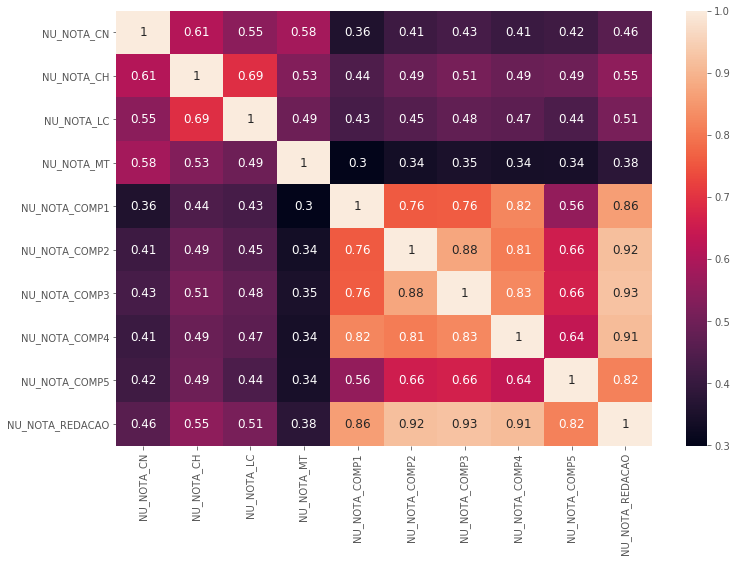

In [453]:
# plotando novamente a matrix de correlação somente com estas features
correlacao2 = df_train[features_correlacao].corr()
axis = plt.subplots(figsize = (12,8))
sns.heatmap(correlacao2, annot=True, annot_kws = {"size":12})

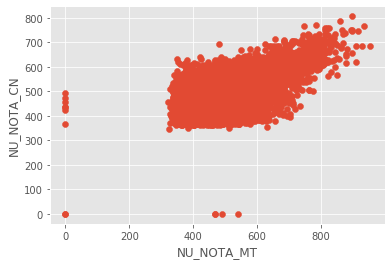

In [454]:
# exemplo correlação moderadamente positiva
plt.xlabel('NU_NOTA_MT')
plt.ylabel('NU_NOTA_CN')
plt.scatter(df_train['NU_NOTA_MT'], df_train['NU_NOTA_CN'])
plt.show()

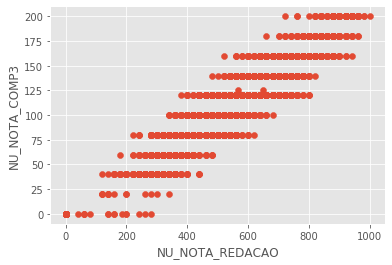

In [455]:
# exemplo correlação fortemente positiva
plt.xlabel('NU_NOTA_REDACAO')
plt.ylabel('NU_NOTA_COMP3')
plt.scatter(df_train['NU_NOTA_REDACAO'], df_train['NU_NOTA_COMP3'])
plt.show()

Identificada as colunas mais importantes, vamos tratar os dados ausentes

In [456]:
df_train[features_correlacao].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_MT         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
dtype: int64

Remoção do dataset de treino as observações nulas e zeradas das features NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_LC  
para que o modelo treinado siga uma distribuição normal.

In [457]:
df_train = df_train.loc[(df_train['NU_NOTA_CN'].notnull()) & (df_train['NU_NOTA_CN']!=0) & 
                  (df_train['NU_NOTA_CH'].notnull()) & (df_train['NU_NOTA_CH']!=0) & 
                  (df_train['NU_NOTA_LC'].notnull())&(df_train['NU_NOTA_LC']!=0) &
                  (df_train['NU_NOTA_REDACAO'].notnull() & (df_train['NU_NOTA_REDACAO'] != 0))]

In [458]:
df_train[features_correlacao].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

In [459]:
# realizando o mesmo procedimento para teste
df_test = df_test.loc[(df_test['NU_NOTA_CN'].notnull()) & (df_test['NU_NOTA_CN']!=0) & 
                  (df_test['NU_NOTA_CH'].notnull()) & (df_test['NU_NOTA_CH']!=0) & 
                  (df_test['NU_NOTA_LC'].notnull())&(df_test['NU_NOTA_LC']!=0) & 
                  (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO']!=0)]

In [460]:
df_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

Separando as variáveis para aplicação do modelo

In [461]:
num_inscricao = df_test['NU_INSCRICAO']

y_train = df_train['NU_NOTA_MT']

x_train = df_train[features]
x_test = df_test[features]

Prevendo as notas de matemática utilizando o modelo de **Regressão Linear**.

In [462]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [463]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [464]:
predict = model.predict(x_test)
predict

array([437.89652566, 433.45537063, 583.31074163, ..., 462.49740302,
       620.92839092, 447.97153649])

Preparando arquivo para submissão ao desafio

In [465]:
# gerar arquivo csv
submission = pd.DataFrame({
    "NU_INSCRICAO": num_inscricao,
    "NU_NOTA_MT": predict
})

submission.to_csv('answer.csv', index=False)
print("Arquivo gerado com sucesso")
submission

Arquivo gerado com sucesso


,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,437.896526
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433.455371
2,b38a03232f43b11c9d0788abaf060f7366053b6d,583.310742
4,715494628a50142ce8cb17191cfe6d0f3cae0934,539.060764
5,e656d6bad65c93fb2880f1eba5037008c8e75774,464.041472
...,...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724,510.973187
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,443.396266
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,462.497403
4573,655fa6306720ff16e825903b5422a46608a77545,620.928391
